In [1]:
import statsmodels.api as sm
dta = sm.datasets.sunspots.load_pandas().data

In [2]:
import matplotlib.pyplot as plt

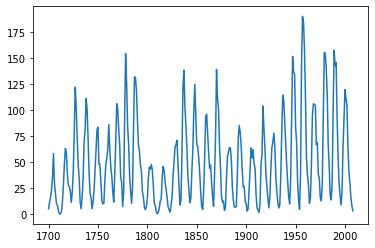

In [3]:
plt.plot(dta.YEAR, dta.SUNACTIVITY)

In [4]:
sunact  = dta.SUNACTIVITY

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

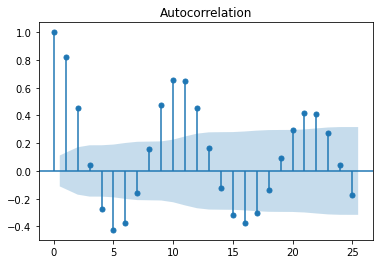

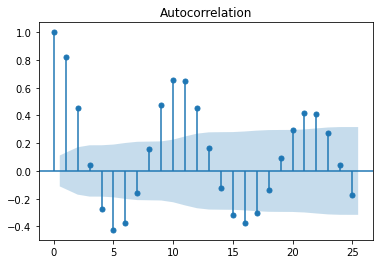

In [6]:
plot_acf(sunact)

In [7]:
sunactD1 = sunact[11:].values-sunact[0:-11].values
sunactD2 = sunactD1[11:]-sunactD1[0:-11]

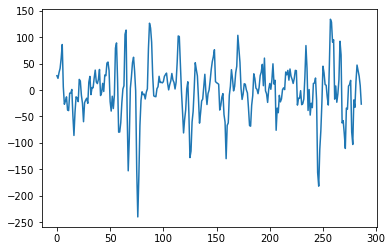

In [8]:
plt.plot(sunactD2)

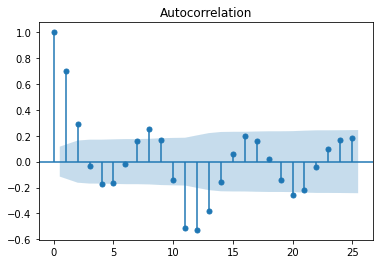

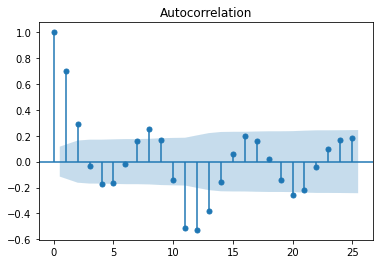

In [9]:
plot_acf(sunactD2)

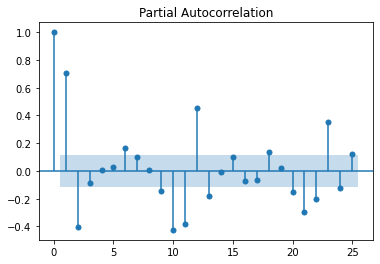

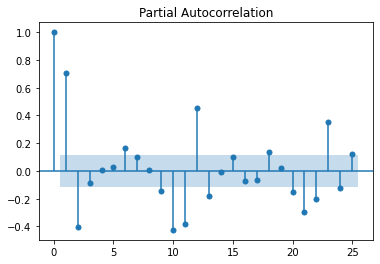

In [11]:
plot_pacf(sunactD2)

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [13]:
model1 = SARIMAX(endog = sunact, order=(2,1,3), seasonal_order=(1,1,[1],11))
model1_fit = model1.fit()

C:\Users\agust\anaconda3\envs\CEIA\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
residuals = model1_fit.resid

(array([  5.,  23.,  50., 103.,  77.,  31.,  11.,   7.,   0.,   2.]),
 array([-42.26272645, -31.31748754, -20.37224862,  -9.42700971,
          1.51822921,  12.46346812,  23.40870704,  34.35394595,
         45.29918487,  56.24442378,  67.1896627 ]),
 <BarContainer object of 10 artists>)

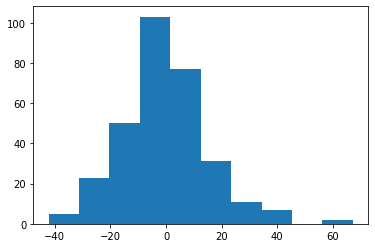

In [15]:
plt.hist(residuals)

In [16]:
from statsmodels.graphics.gofplots import qqplot

C:\Users\agust\anaconda3\envs\CEIA\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


[]

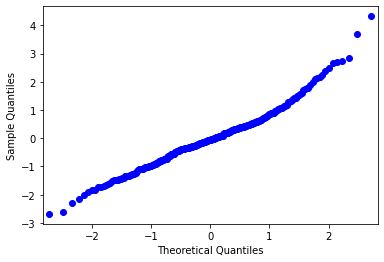

In [17]:
qqplot((residuals-residuals.mean())/residuals.std())
plt.plot()

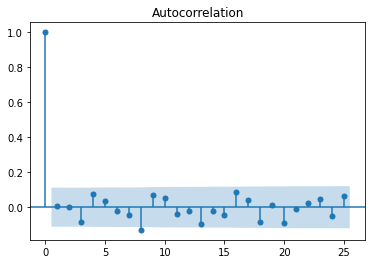

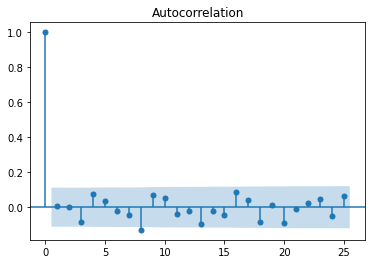

In [18]:
plot_acf(residuals)

In [19]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 11)   Log Likelihood               -1242.333
Date:                              Wed, 08 Dec 2021   AIC                           2500.666
Time:                                      13:26:25   BIC                           2530.216
Sample:                                           0   HQIC                          2512.496
                                              - 309                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5784      0.040     39.789      0.000       1.501       1.656
ar.L2         -0.9046      0.031    -29.214      0.000      -0.965      -0.844
ma.L1         -1.4208      0.063    -22.610      0.000      -1.544      -1.298
ma.L2          0.4654      0.091      5.098      0.000       0.286       0.644
ma.L3          0.1000      0.062      1.616      0.106      -0.021       0.221
ar.S.L11       0.0301      0.070      0.429      0.668      -0.107       0.167
ma.S.L11      -0.9977      1.852     -0.539      0.590      -4.627       2.631
sigma2       223.7805    408.650      0.548      0.584    -577.158    1024.719
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                52.18
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             0.61
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color='blue'>**OBSERVACION** Prob(Q) es el p-valor del test. Si Prob(Q)>0.05 no hay evidencia suficiente para decir que los residuos no sean estacionarios, Ljung-Box (L1) (Q):es el valor del estadístico <\font>